In [72]:
import os, sys
import numpy as np
import time
import matplotlib.pyplot as plt
sys.path.append('/home/yueqi/lib/rivuletpy')
sys.path.append('../')
from src.preprocessing import *
np.set_printoptions(precision=2, suppress=True, edgeitems=5)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from rivuletpy import *

In [3]:
import math

In [4]:
from filtering.riveal import *
#from rivuletpy.utils.io impofrom rt *
from filtering.thresholding import rescale

print('finish import')

Using TensorFlow backend.


finish import


In [28]:
img = loadtiff3d('/home/yueqi/lib/rivuletpy/tests/data/test.tif')
dtype = img.dtype
swc = loadswc('/home/yueqi/lib/rivuletpy/tests/data/test.swc')
print('finish load')

finish load


In [29]:
img.shape

(409, 415, 119)

In [30]:
mip = np.max(img, axis=2)
mip.shape

(409, 415)

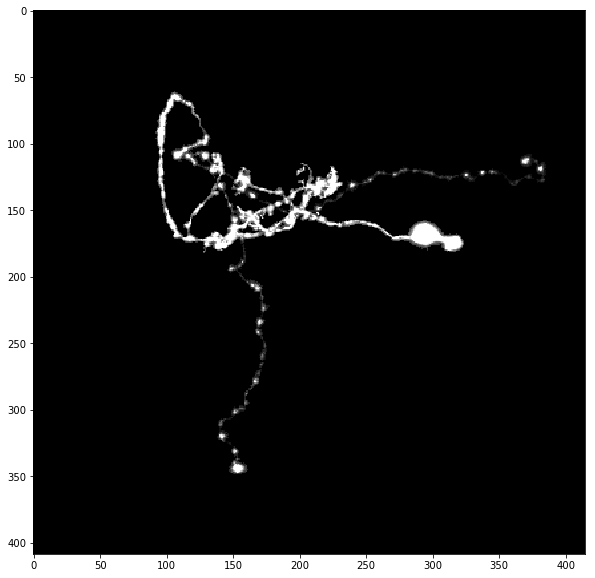

In [31]:
plt.figure(figsize=(10,10))
plt.imshow(mip, cmap='gray')
plt.show()

# convert swc to png

In [32]:
K = 9
margin = 3 * K
img = padimg(img, margin)
swc = padswc(swc, margin)

In [35]:
np.isin(swc[:,1], [1,3,4])

array([ True, False,  True,  True,  True, ...,  True,  True, False,  True,
        True], dtype=bool)

In [48]:
skimg = make_sk_img(img.shape, swc)
mip_sk = np.max(skimg, axis=2)
mip_sk.shape

(463, 469)

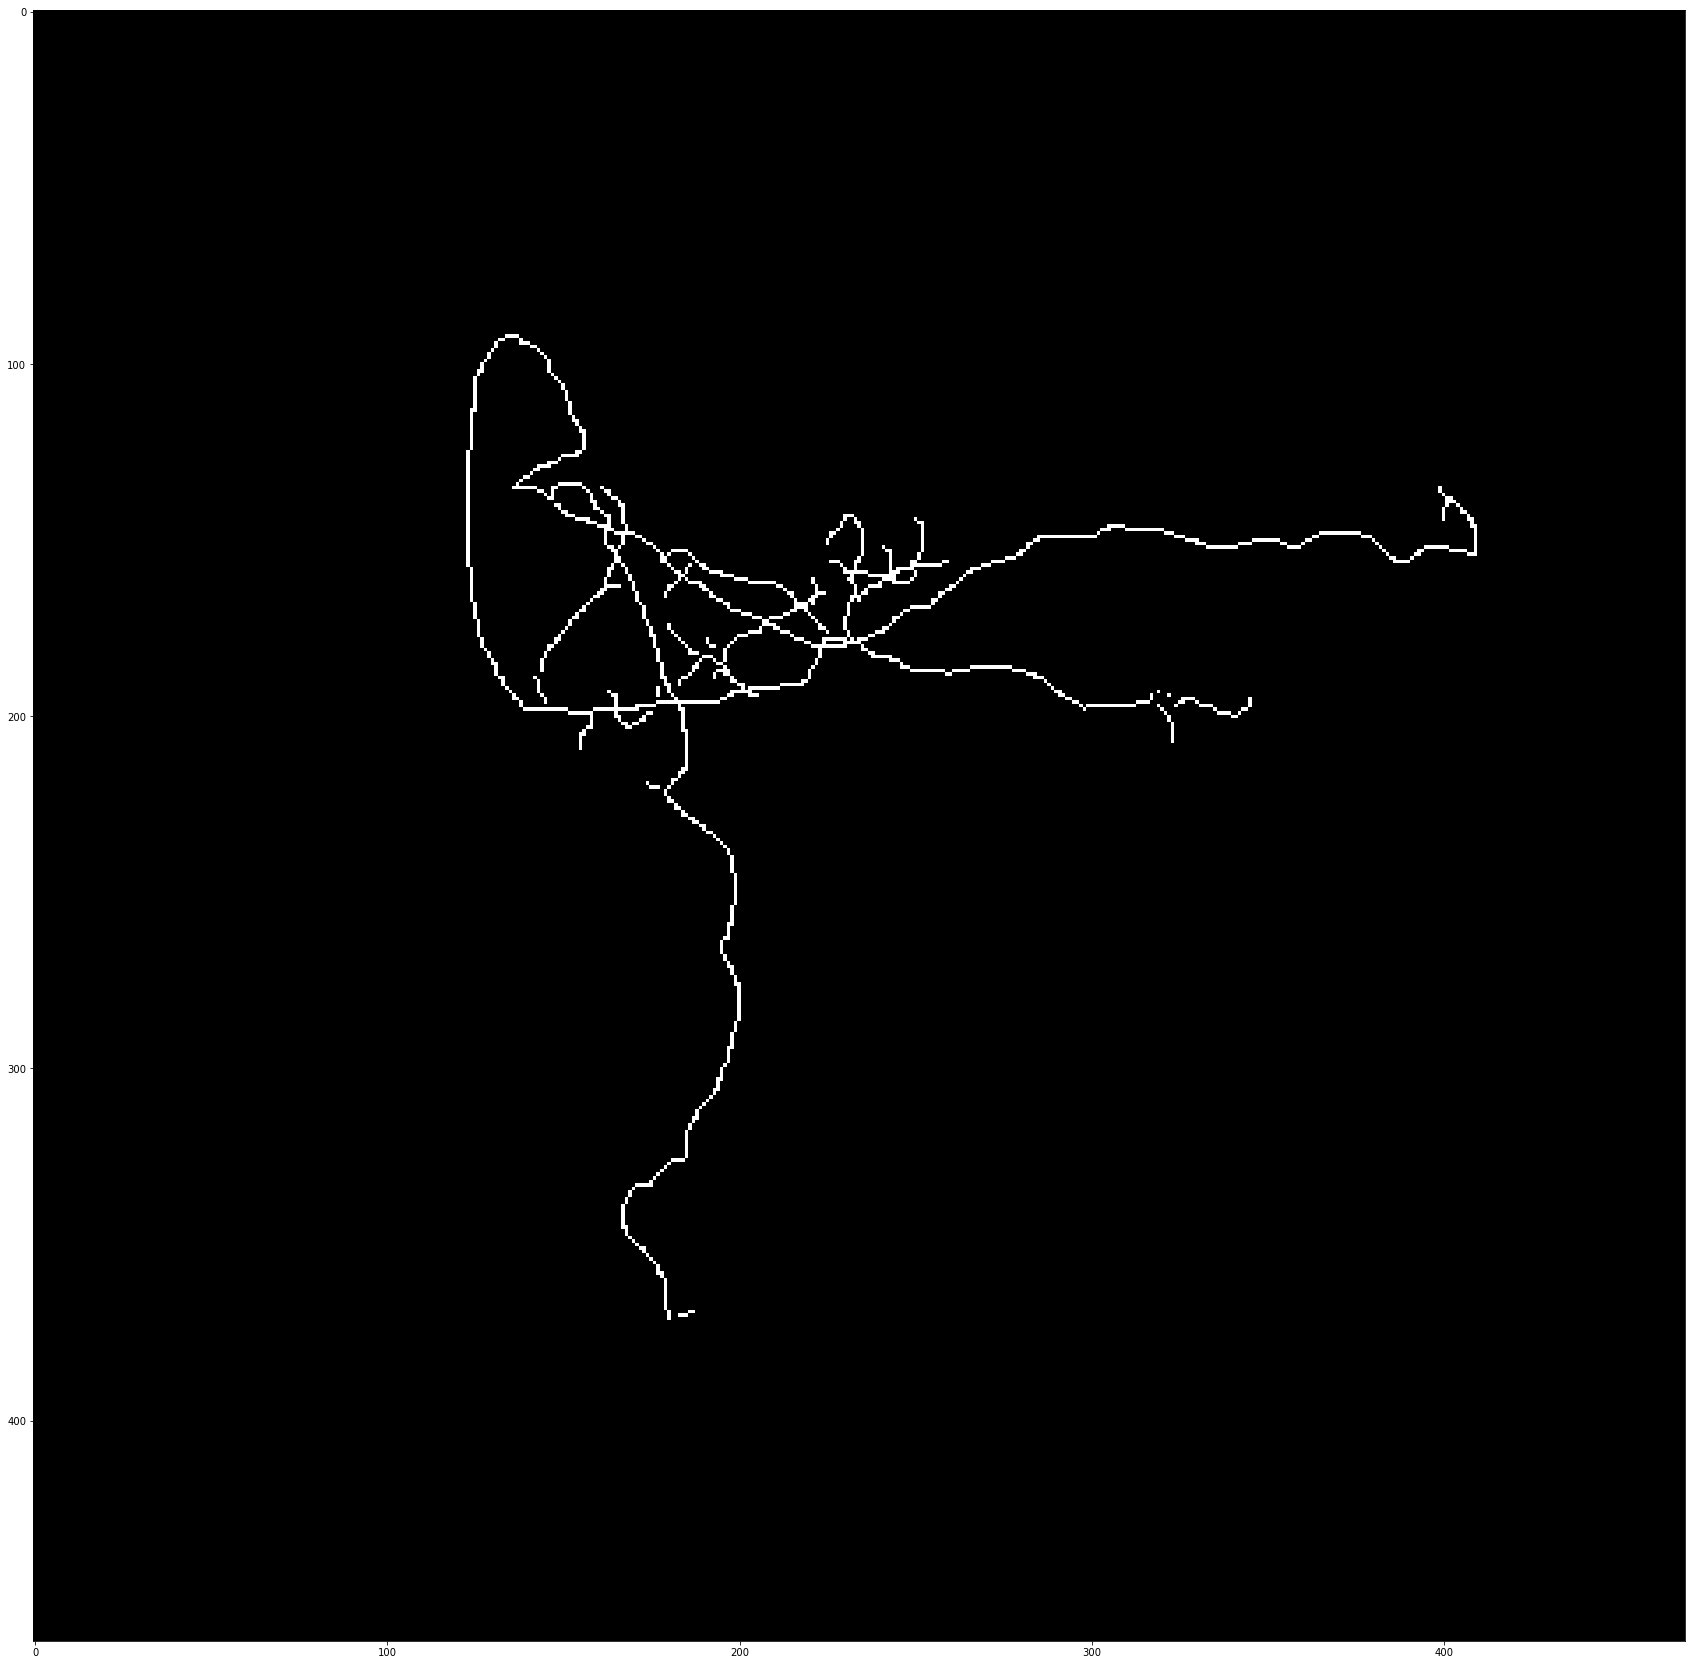

In [49]:
plt.figure(figsize=(30,30))
plt.imshow(mip_sk*250, cmap='gray')
plt.show()

# use skfmm

In [40]:
dt, foreground_region = make_skdt(img.shape, swc, K)

In [45]:
mip_dt = np.max(dt, axis=2)
mip_dt.shape

(481, 487)

## the skfmm causes some edge artifacts

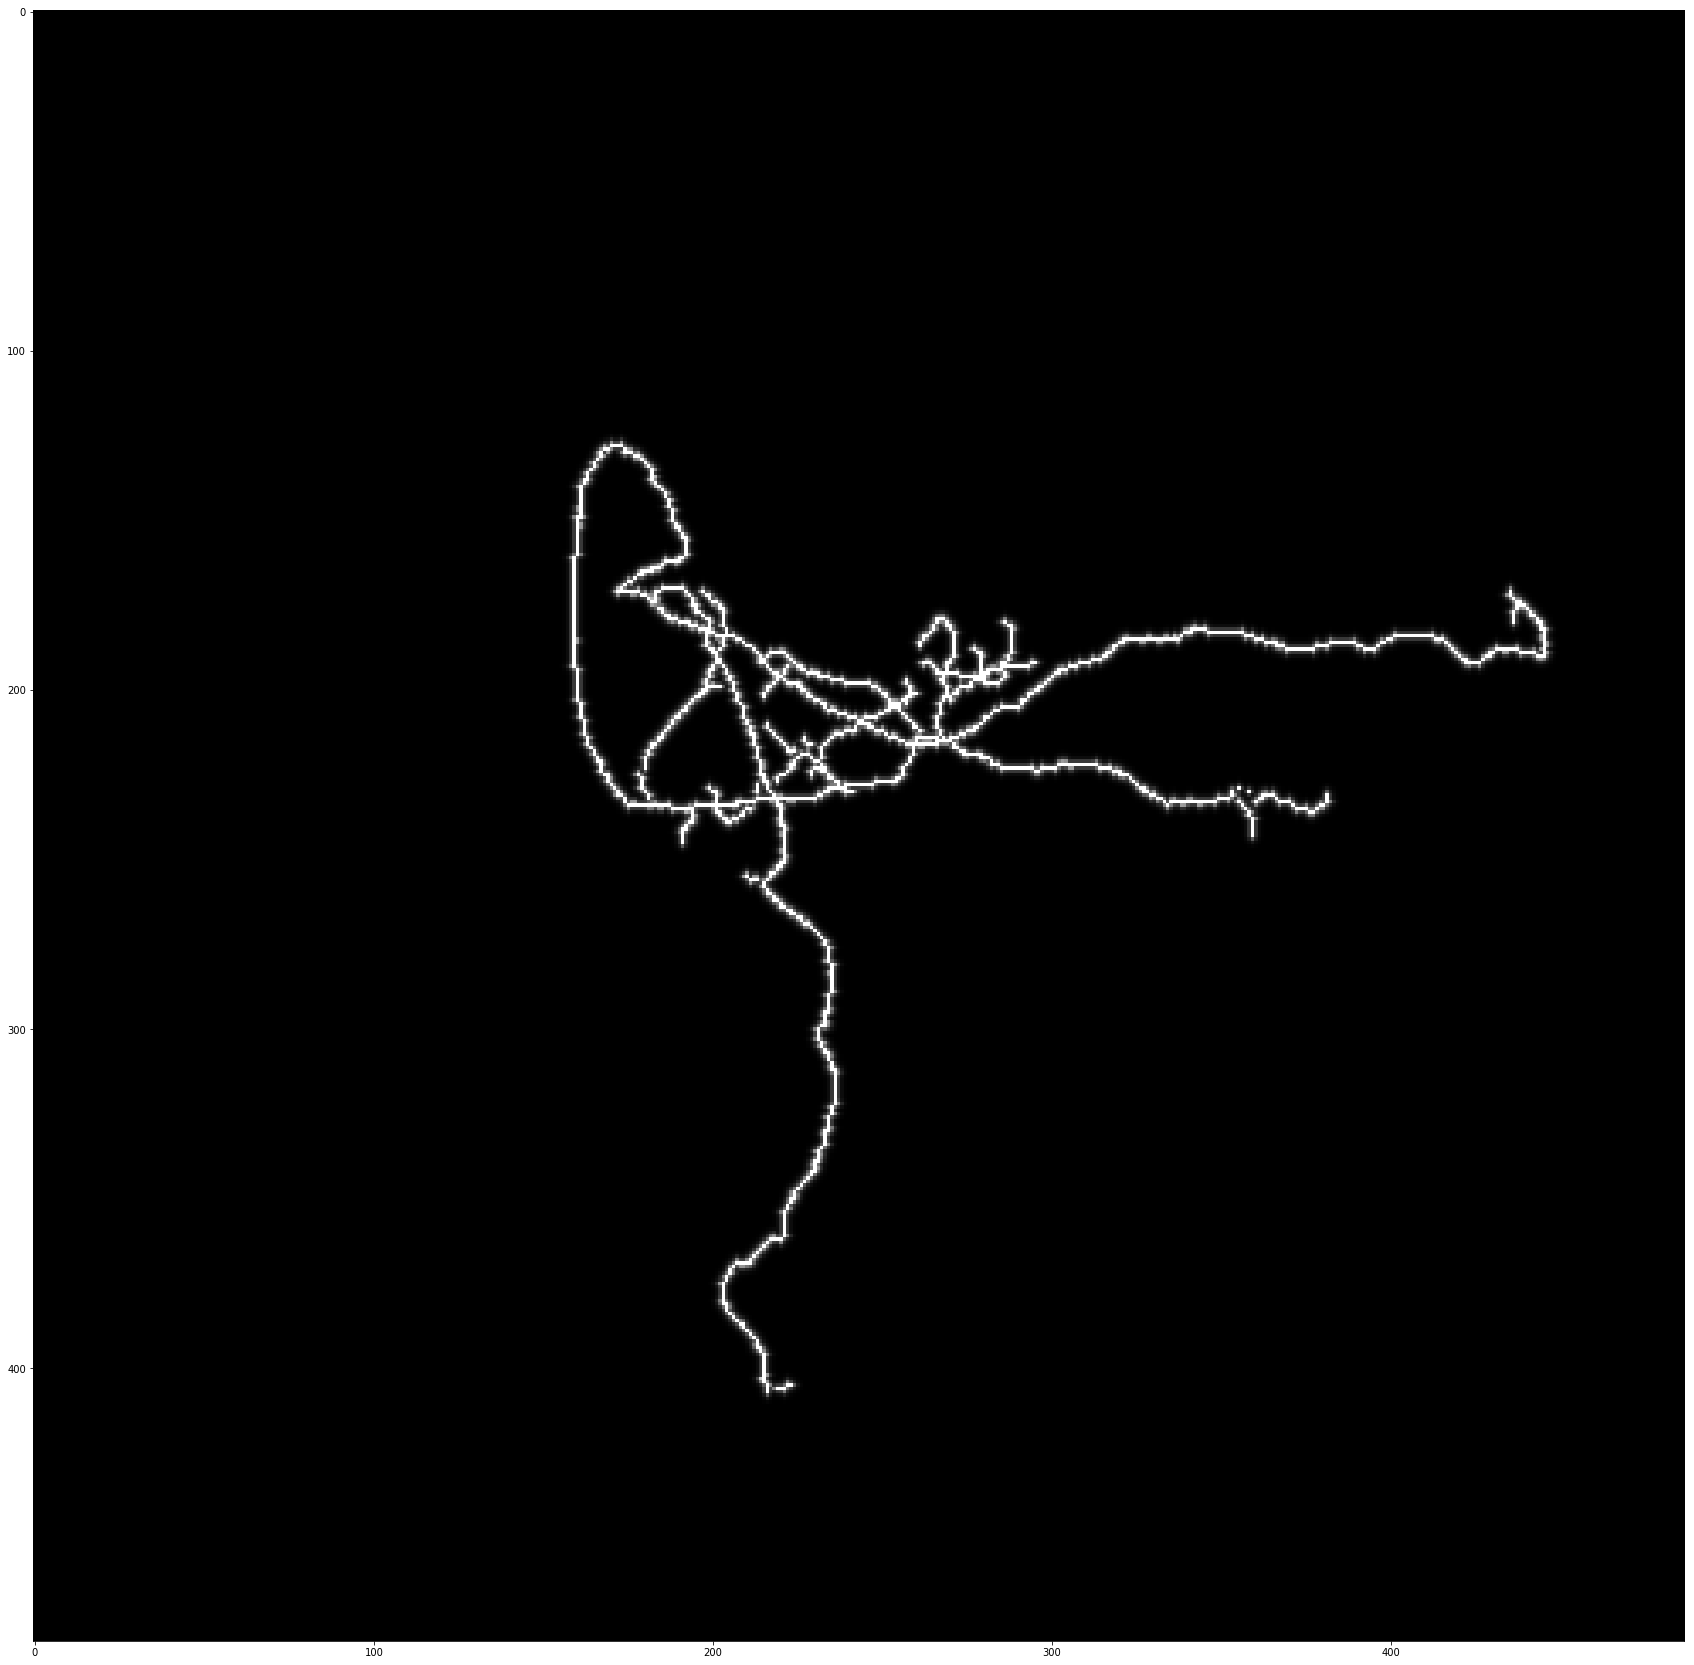

In [57]:
plt.figure(figsize=(30,30))
plt.imshow(mip_dt/mip_dt.max(), cmap='gray')
plt.show()

# use a svg from neuromorpho

In [77]:
with open('../test_data/SM99-1-B.CNG.swc', 'r') as f:
    test_swc_lines = f.read()

In [95]:
swc = loadswc('../test_data/SM99-1-B.CNG.swc')
swc[:5]

array([[ 1.  ,  1.  ,  0.  ,  0.  ,  0.  ,  7.32, -1.  ],
       [ 2.  ,  1.  , -7.27, -0.76,  0.  ,  7.32,  1.  ],
       [ 3.  ,  1.  ,  7.27,  0.76,  0.  ,  7.32,  1.  ],
       [ 4.  ,  4.  , -3.56,  2.28, -1.75,  0.09,  1.  ],
       [ 5.  ,  4.  , -3.76,  4.19, -1.75,  0.09,  4.  ]])

In [96]:
swc[:,2:5] += np.array([128, 256, 200])

In [97]:
swc[1, :]

array([   2.  ,    1.  ,  120.73,  255.24,  200.  ,    7.32,    1.  ])

In [105]:
imgshape = (256, 512, 400)

In [106]:
skimg_test = make_sk_img(imgshape, swc)
mip_sk = np.max(skimg_test, axis=2)
mip_sk.shape

(256, 512)

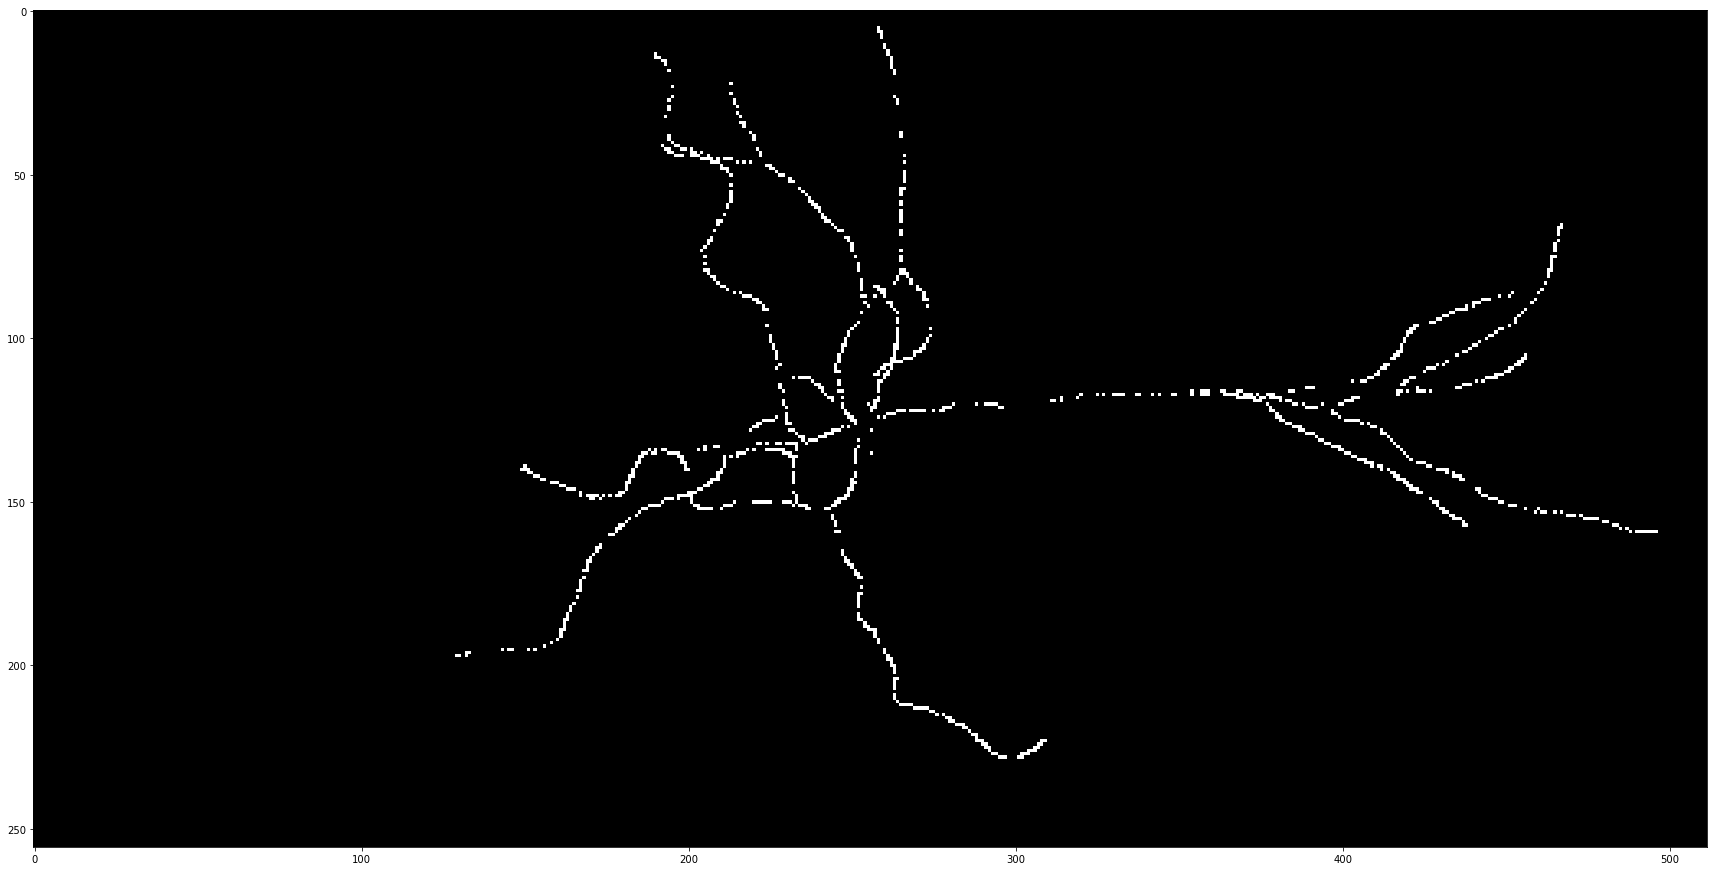

In [107]:
plt.figure(figsize=(30,30))
plt.imshow(mip_sk/mip_sk.max(), cmap='gray')
plt.show()

In [108]:
skimg_2d_vertices = draw_sk_img_vertices(imgshape, swc, dims=2)
skimg_2d_vertices.shape

(256, 512)

In [109]:
skimg_2d_vertices.max()

1.0

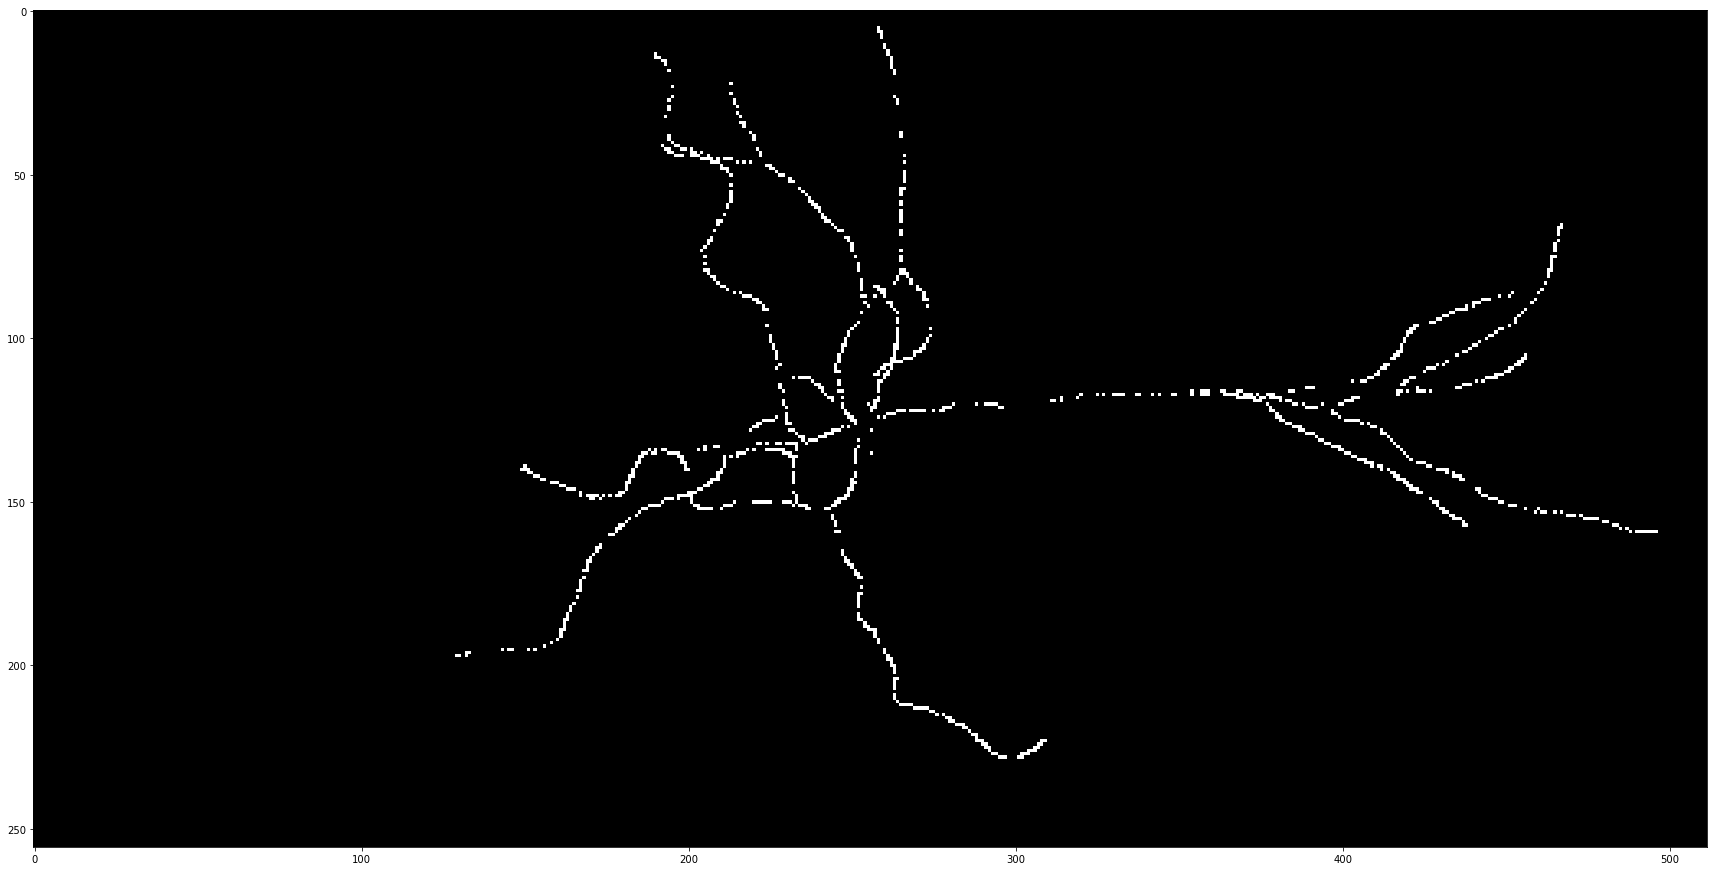

In [110]:
plt.figure(figsize=(30,30))
plt.imshow(skimg_2d_vertices/skimg_2d_vertices.max(), cmap='gray')
plt.show()

In [111]:
skimg_2d_render = draw_sk_img(imgshape, swc, dims=2)
skimg_2d_render.shape

(256, 512)

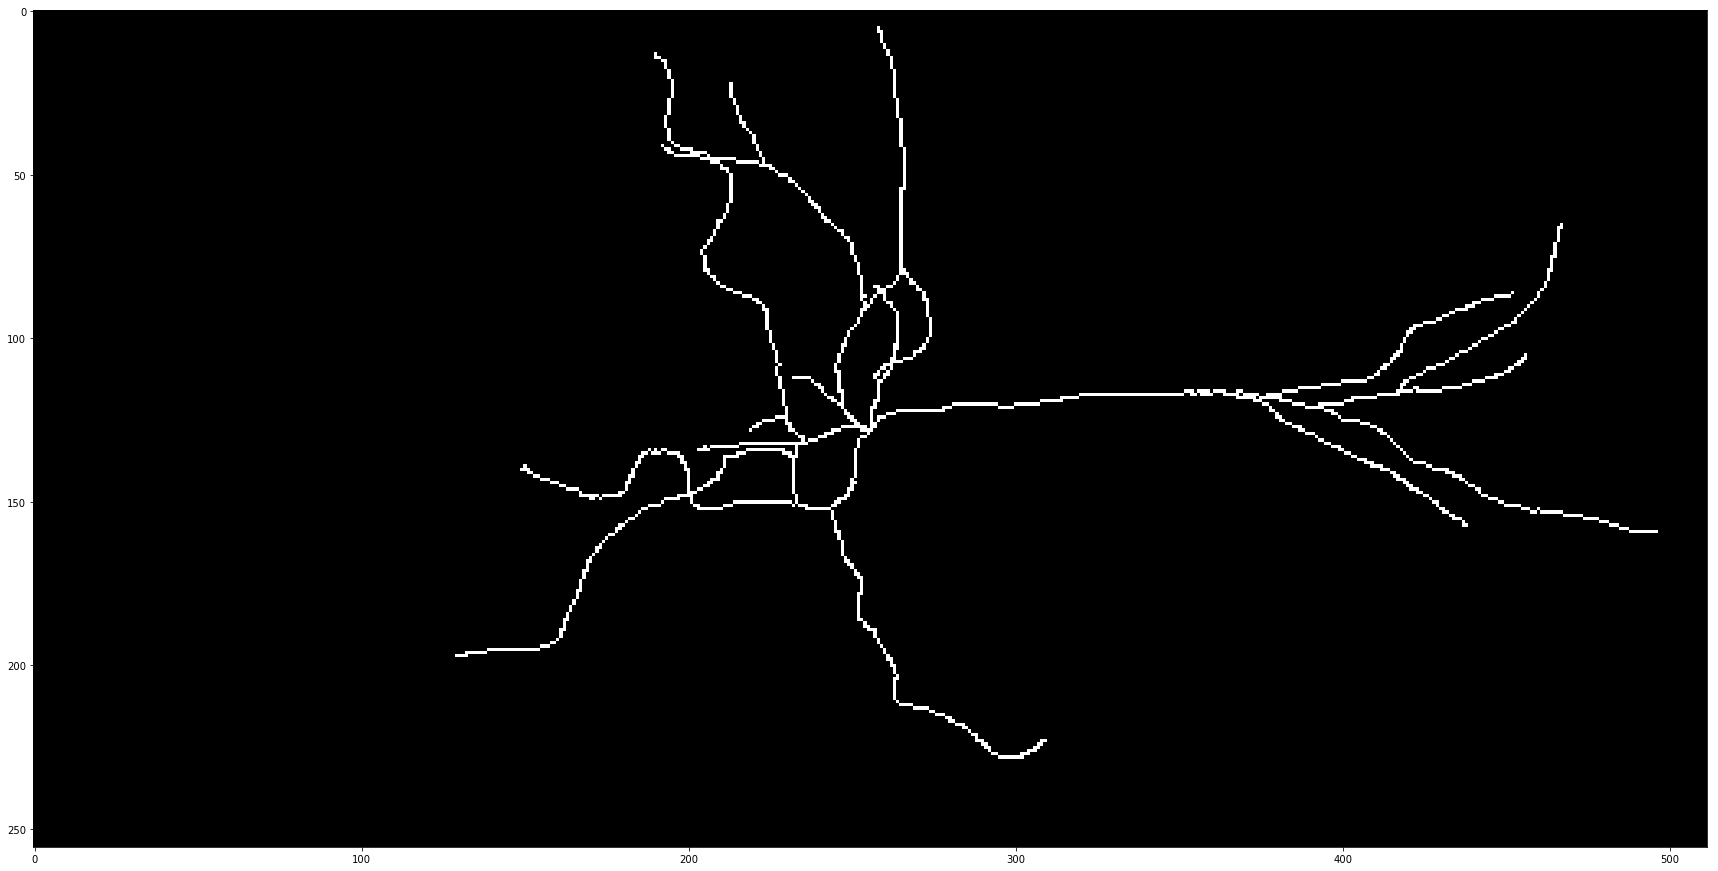

In [112]:
plt.figure(figsize=(30,30))
plt.imshow(skimg_2d_render/skimg_2d_render.max(), cmap='gray')
plt.show()

In [113]:
skimg_3d_render = draw_sk_img(imgshape, swc, dims=3)
mip_sk_3d = np.max(skimg_3d_render, axis=2)
mip_sk_3d.shape

(256, 512)

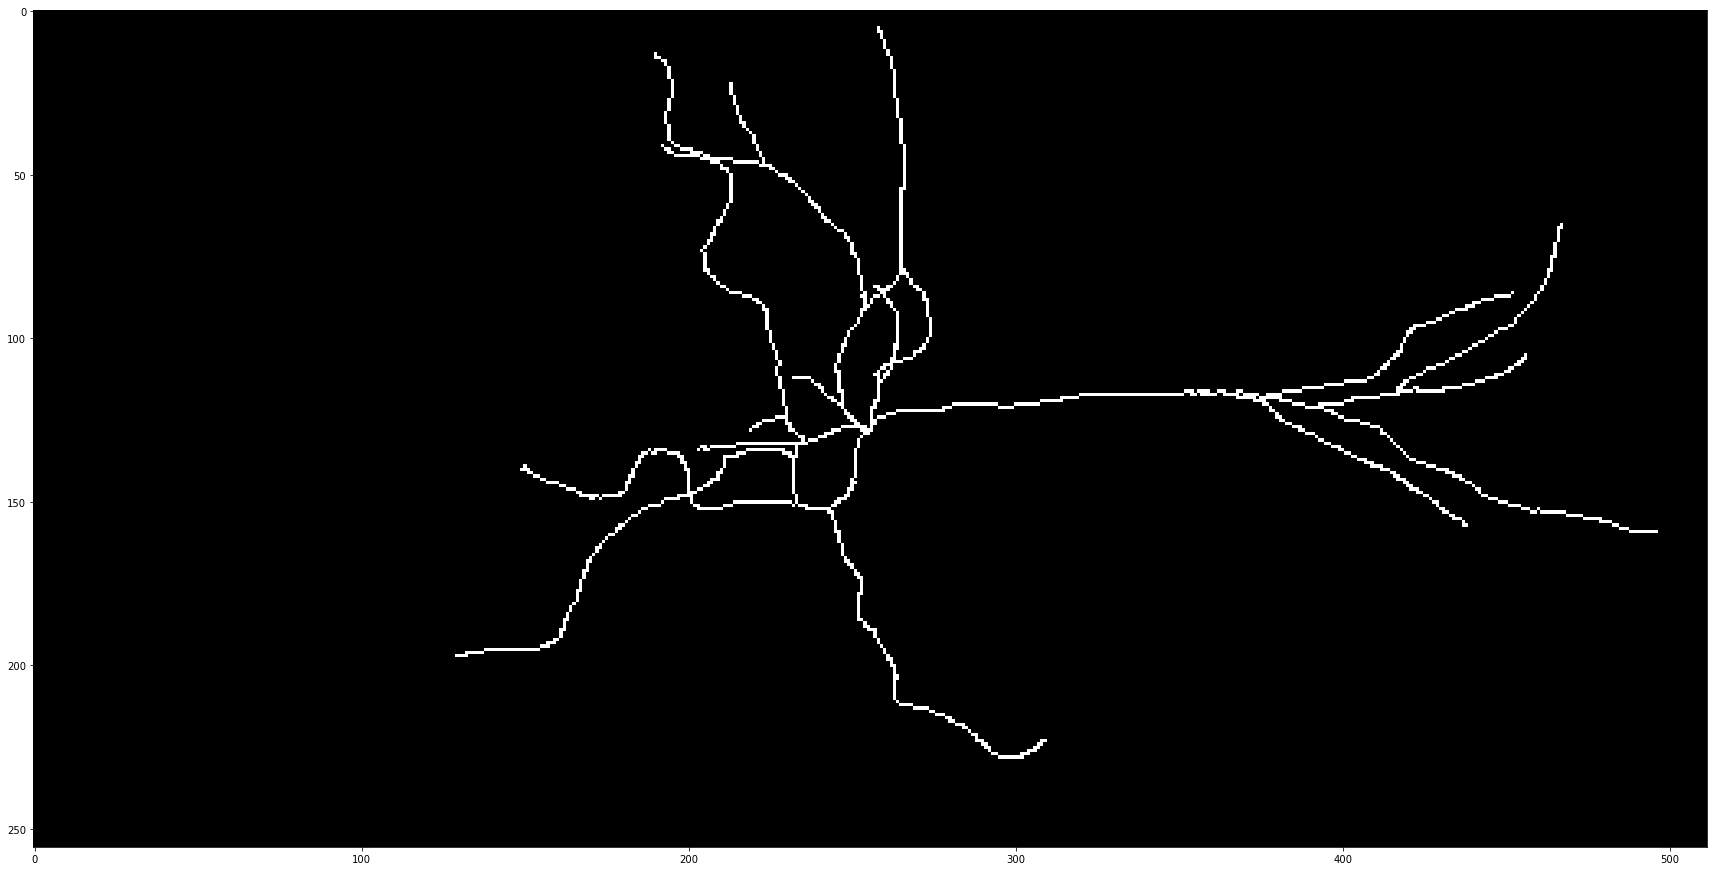

In [114]:
plt.figure(figsize=(30,30))
plt.imshow(mip_sk_3d/mip_sk_3d.max(), cmap='gray')
plt.show()